# Анализ успешности игры

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

Задача провести оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Выявить определяющие успешность игры закономерности.

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 


1. Открыть файл с данными и изучить общую информацию 

2. Подготовить данные 

 - Заменить названия столбцов; 

 - Преобразовать данные в нужные типы; 

 - Обработать пропуски при необходимости; 

 - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец. 

3. Исследовательский анализ данных 

 - Сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 

 - Как менялись продажи по платформам. Найти платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 


 - Какие платформы лидируют по продажам, растут или падают?

 - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

 - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

 - Соотнести выводы с продажами игр на других платформах. 

 - Посмотреть на общее распределение игр по жанрам.

4. Составить портрет пользователя каждого региона 

Определить для пользователя каждого региона (NA, EU, JP): 

  - Определить самые популярные платформы (топ-5). Опишите различия в долях продаж. 

  - Определить самые популярные жанры (топ-5). Поясните разницу. 

  - Влияет ли рейтинг ESRB на продажи в отдельном регионе? 

5. Проверить гипотезы 

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 

 - Средние пользовательские рейтинги жанров Action и Sports разные. 

6. Написать общий вывод 

## 1. Загрузка и изучение данных

Загрузим данные и посмотрим на содержимое

In [1]:
from IPython.display import display
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## 2. Подготовка данных

Переименуем столбцы, приведем все названия в нижний регистр

In [2]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


year_of_release надо преобразовать в целое значение для экономии памяти и скорости расчетов, но предварительно надо избавится от пропусков

In [3]:
print('Прорусков', len(df[df['year_of_release'].isna()])/16715) # считаем сколько пропусков
print('Это составляет', len(df[df['year_of_release'].isna()])/16715*100, '%')

Прорусков 0.01609332934489979
Это составляет 1.609332934489979 %


Пропусков не так много можно их оставить. Причин возникновения пропусков может быть много, это и неизвестность года выпуска и резные релизы игры в разных годах

преобразуем в целый тип однако для этого необходимо пропуски заменить на значение 'nan'

In [4]:

df['year_of_release'].astype('Int64')
df['year_of_release'].head()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64

Посмотрим на данные рейтинга критиков

In [5]:

print('Пропусков:', len(df[df['critic_score'].isna()])) # считаем сколько пропусков critic_score
df['critic_score'].unique()

Пропусков: 8578


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Больше половины, удалять так же не стоит, оставим прпуски как есть. Отсутствие рейтинга может возникнуть по причине отсутствия отзывово об игре.


In [6]:
pd.array(df['critic_score'], dtype='Int64')
df['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

Проверим пользовательские рейтинги

In [7]:
print(df['user_score'].value_counts(0))
df['user_score'].unique()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
0.7       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди данных есть пропуски но есть и аббревиатура 'tbd', их не мало. Заменим их нп пропуски NaN чтобы можно было дальше производить вычисления с использованием этих данных

In [8]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df.user_score = df.user_score.astype('float64')
df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

Проверим данные в столбце рейтинга

In [9]:
df['rating']

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: rating, Length: 16715, dtype: object

По скольку заменить рейтинг мы не можем каким либо средним значением, лучше заменить пропуски как 'unknoun'

In [10]:
df['rating'] = df['rating'].fillna('unknoun')
df['rating'].value_counts()

unknoun    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

In [11]:
df_sales = pd.DataFrame(df, columns=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
df_sales.sum()

na_sales       4402.35
eu_sales       2424.67
jp_sales       1297.37
other_sales     791.32
dtype: float64

В северной америке больше всего продаж, даже больше чем во всех остальных регионах.

### 3. Анализ полученных данных

Посчитаем количество выпущенных игр по годам.

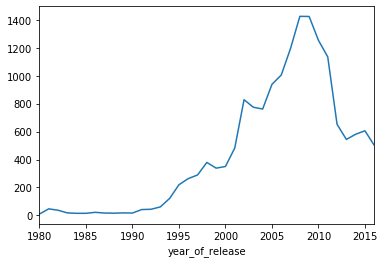

In [12]:
df.groupby('year_of_release')['name'].count().plot(x='year_of_release', y='name')

Как видно из графика начиная с 2000 года резкий рост выпускаемых игр, а после 2010 такой же резкий спад.

Для оценки общих продаж по платформам сначала посчитаем общее количество продаж по регионам и построим сводную таблицу по плтформам, считая продажи по годам.

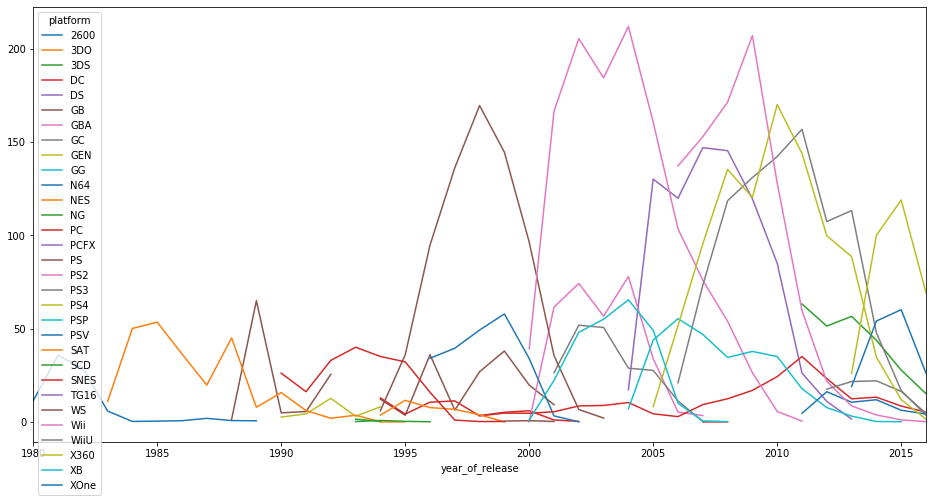

In [13]:
df['total_sales'] = df.loc[:, 'na_sales':'other_sales'].sum(axis=1)
df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line', figsize=(16, 8))

Выделяются 7 платформ с наибольшми продажами. Возьмем первые 10 платформ и посмотрим на распределение продаж по годам.

In [14]:
top_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
print(top_platform)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


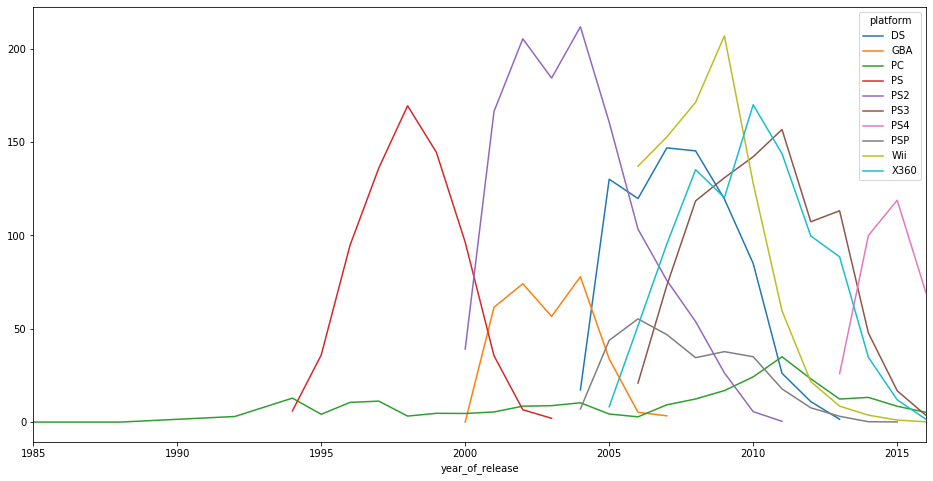

In [15]:
(
    df[df['platform']
       .isin(top_platform.index)]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='line', figsize=(16, 8))
)

In [16]:
df_top = df[df['platform'].isin(top_platform.index)]
df_top['year_of_release'].dropna()
df_top_stat = df_top.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
df_top_stat['term'] = df_top_stat[('max', 'year_of_release')] - df_top_stat[('min', 'year_of_release')]
print('Средняя продолжительность платформы', df_top_stat['term'].mean(), 'лет')
df_top_stat

Средняя продолжительность платформы 13.1 лет


,min,max,term
,year_of_release,year_of_release,
platform,,,
DS,1985.0,2013.0,28.0
GBA,2000.0,2007.0,7.0
PC,1985.0,2016.0,31.0
PS,1994.0,2003.0,9.0
PS2,2000.0,2011.0,11.0
PS3,2006.0,2016.0,10.0
PS4,2013.0,2016.0,3.0
PSP,2004.0,2015.0,11.0


Чтобы выявить перспективные платформы выберим данные за последние 5 лет с 2005 по 2015 года и посмотрим кто из на начальном периоде жизненного цикла

In [17]:
df_select = df.query('2010 <= year_of_release <= 2015')
df_select.head()    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,unknoun,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


Посмотрим распределение продаж за этот период

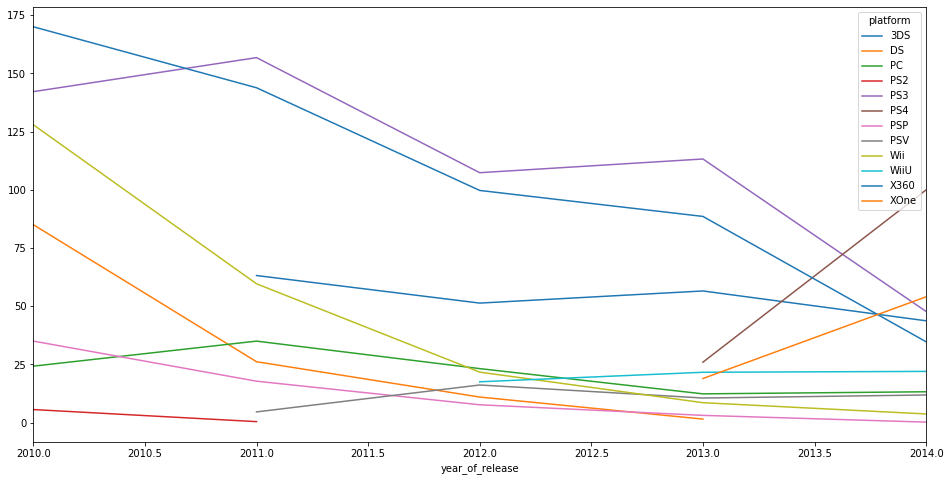

In [18]:
df_select_pivot = df_select.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_select_pivot.plot(kind='line', figsize=(16, 8))


За этот период почти все лидирующие платформы на спаде и практически закончили свой жизненный цикл. В перспективные выделяются платформы PS4, 3DS, XOne, WiiU и PSV так как они еще в начале среднего периода существования платформы. Построим диаграмму размаха для оценки разброса продаж.

(0, 30)

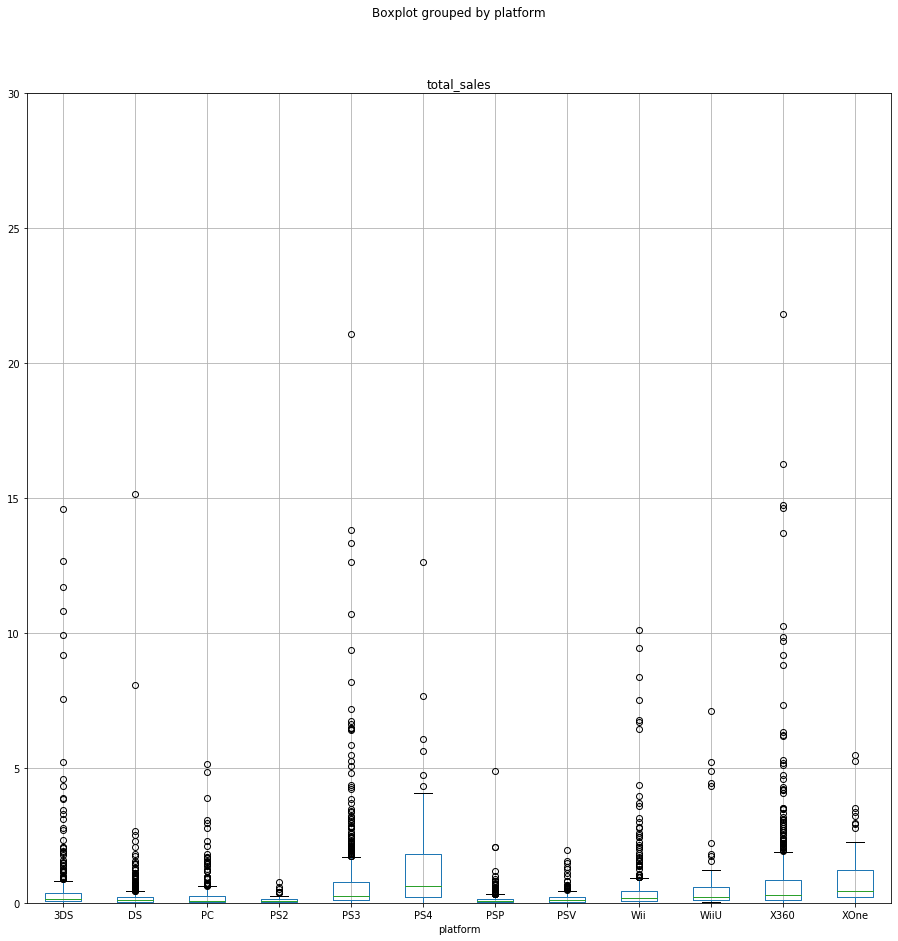

In [19]:
import warnings
warnings.simplefilter("ignore")

df_select.boxplot(column=('total_sales'), by=('platform'), figsize=(15,15))
plt.ylim(0, 30)

У PS4 самое высокое медианное значение хоть и большая часть квартильи стремится к минимальному. У XOne тоже немаленькое значения разброса, что говорит о большом количестве продаж этих платформ и учитывая что это платформы перспективные то имеет смысл их продвигать.

Проверим влияние отзывов на продажи платформы PS2.
- сделаем выборку для этой платформы и построим графики расеивания

In [20]:
df_select_ps2 = df_select[df_select['platform'] == 'PS2']
df_select_ps2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2696,FIFA Soccer 11,PS2,2010.0,Sports,0.11,0.29,0.00,0.36,NaN,6.6,E,0.76
3408,Silent Hill: Shattered Memories,PS2,2010.0,Action,0.13,0.22,0.01,0.23,77.0,6.8,M,0.59
3987,Madden NFL 11,PS2,2010.0,Sports,0.41,0.02,0.00,0.07,NaN,7.0,E,0.50
4664,pro evolution soccer 2011,PS2,2010.0,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E,0.41
4669,MLB 10: The Show,PS2,2010.0,Sports,0.20,0.16,0.00,0.05,NaN,NaN,E,0.41


nan

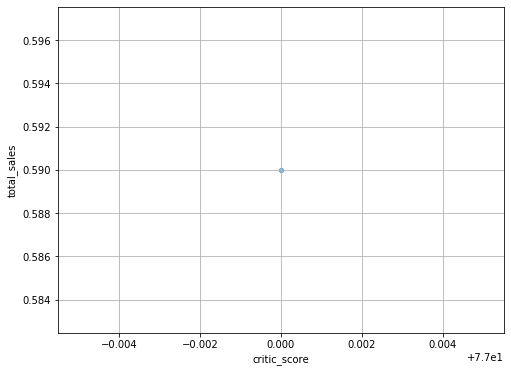

In [21]:

df_select_ps2.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8, 6), sharex=False, grid=True, alpha=0.5)
df_select_ps2['critic_score'].corr(df_select_ps2['total_sales'])

Заметная положительная корреляция. Чем выше оценка критиков тем выше продажы у платформы PS2.

0.07472375514301433

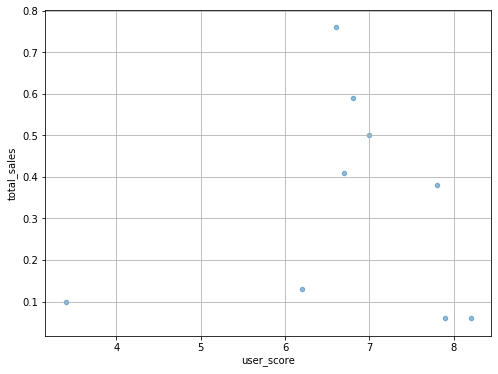

In [22]:
df_select_ps2.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8, 6), sharex=False, grid=True, alpha=0.5)
df_select_ps2['user_score'].corr(df_select_ps2['total_sales'])

Влияние оценки пользователей вдвое меньше влияния критиков но все равно положительное.

3DS
корреляция по рейтингу критиков: 0.38789334324471525
корреляция по рейтингу пользователей: 0.25674938299382455


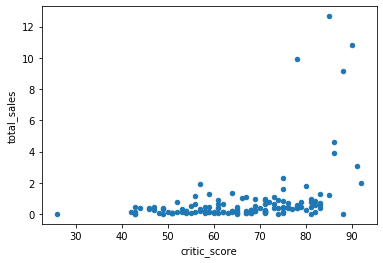

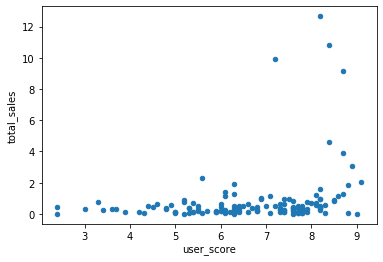

DS
корреляция по рейтингу критиков: 0.2801624634637196
корреляция по рейтингу пользователей: 0.25142811742297444


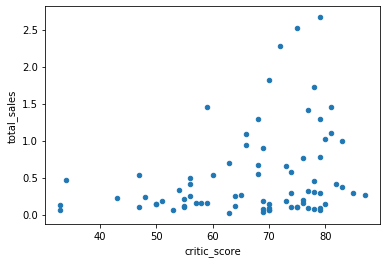

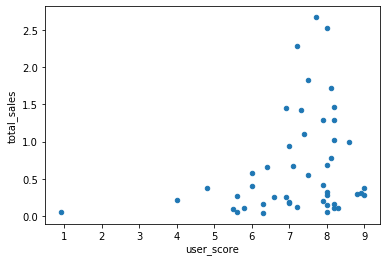

PC
корреляция по рейтингу критиков: 0.36475559973401833
корреляция по рейтингу пользователей: -0.04417592900444342


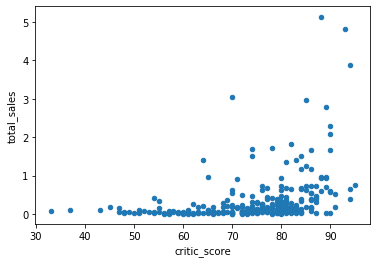

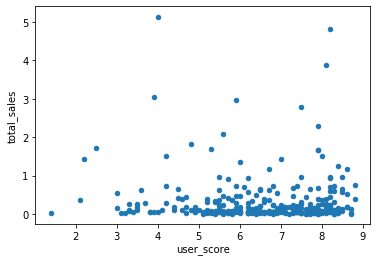

PS2
корреляция по рейтингу критиков: nan
корреляция по рейтингу пользователей: 0.07472375514301433


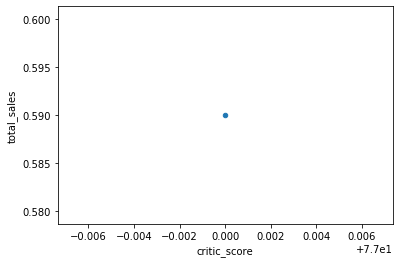

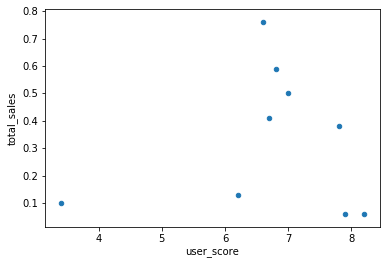

PS3
корреляция по рейтингу критиков: 0.40025387164798815
корреляция по рейтингу пользователей: 0.05690114299987097


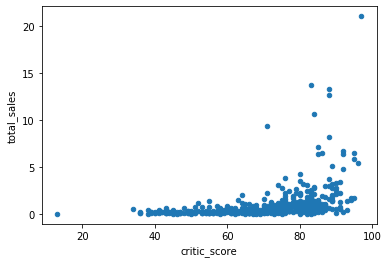

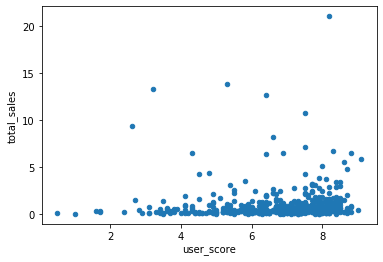

PS4
корреляция по рейтингу критиков: 0.4732675946134546
корреляция по рейтингу пользователей: 0.10217122000178051


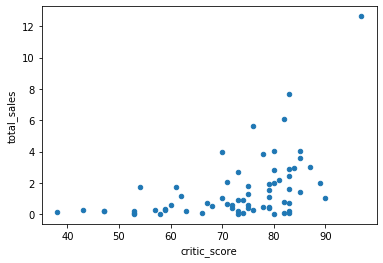

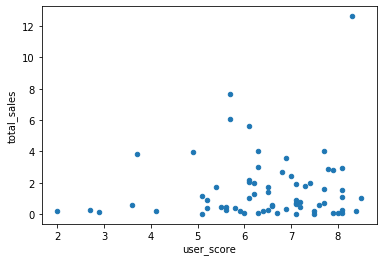

PSP
корреляция по рейтингу критиков: 0.40322494461167796
корреляция по рейтингу пользователей: 0.19063632529960092


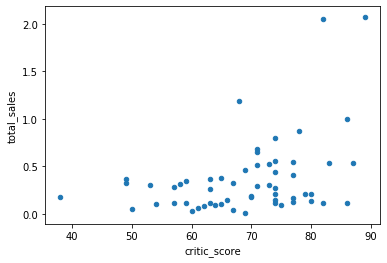

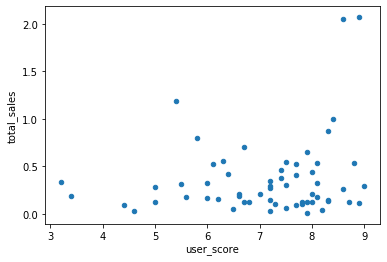

PSV
корреляция по рейтингу критиков: 0.17339405834637045
корреляция по рейтингу пользователей: 0.07344096396644001


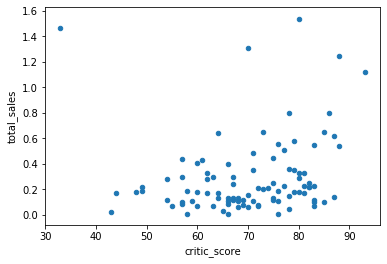

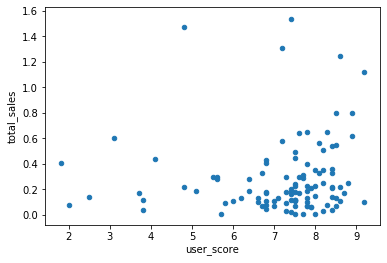

Wii
корреляция по рейтингу критиков: 0.31058771048209965
корреляция по рейтингу пользователей: 0.14715977707531702


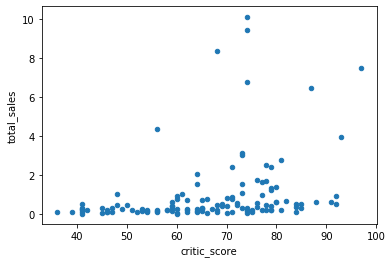

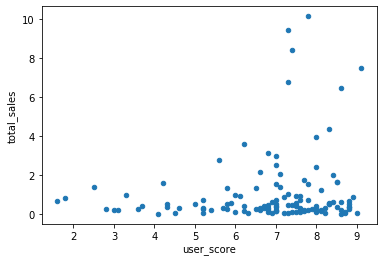

WiiU
корреляция по рейтингу критиков: 0.36014324456116503
корреляция по рейтингу пользователей: 0.41775383479071004


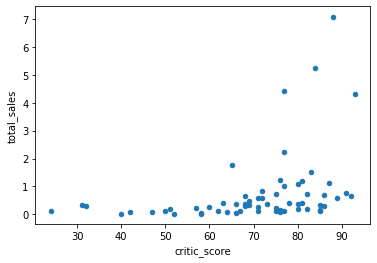

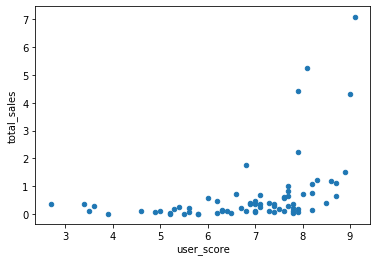

X360
корреляция по рейтингу критиков: 0.34006415813175367
корреляция по рейтингу пользователей: 0.05827549601927055


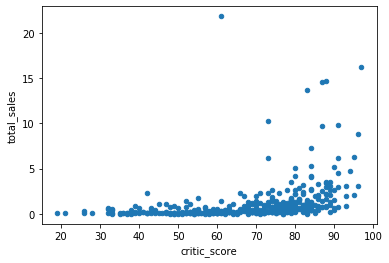

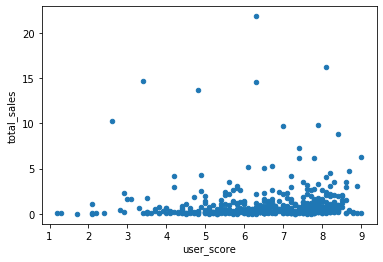

XOne
корреляция по рейтингу критиков: 0.45030895348978656
корреляция по рейтингу пользователей: -0.11272829055395377


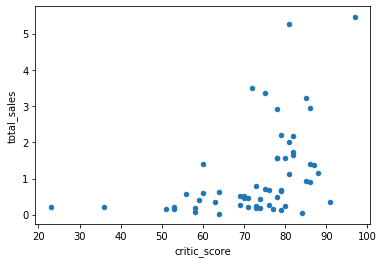

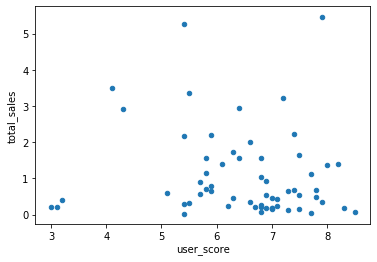

In [23]:
for platform, sales in df_select.groupby('platform'):
    
    print(platform)
    print('корреляция по рейтингу критиков:',sales['total_sales'].corr(sales['critic_score']))
    print('корреляция по рейтингу пользователей:',sales['total_sales'].corr(sales['user_score']))
    sales.plot(kind='scatter', x='critic_score', y='total_sales')
    sales.plot(kind='scatter', x='user_score', y='total_sales')
    plt.show()

На всех платформах рейтинги критиков влияют сильнее рейтингов пользователей на продажи, а на платформах PC и PS4 рейтинги пользователей даже снижают количество продаж

## 4. Портрет пользователей по регионам

Проверим распределение продаж по жанрам игр
- выберим 5 популярных жанров
- выберим 5 популярных платформ

In [24]:
df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)


genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

Игр в жанре "Экшн" продается больше всего, а вот "Стратегии" самые низкие в продажах.

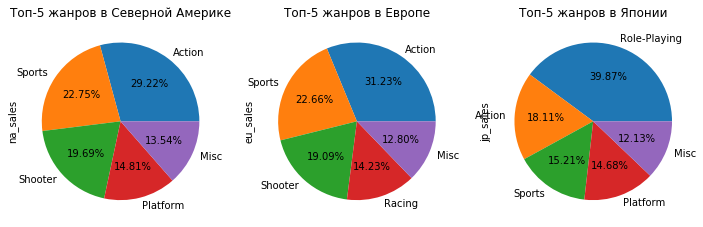

In [25]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 3, 1)
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()\
    .plot(kind='pie', autopct='%1.2f%%', title='Топ-5 жанров в Северной Америке')
plt.subplot(1, 3, 2)
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()\
    .plot(kind='pie', autopct='%1.2f%%', title='Топ-5 жанров в Европе')
plt.subplot(1, 3, 3)
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()\
    .plot(kind='pie', autopct='%1.2f%%', title='Топ-5 жанров в Японии')

Как видим продажы Action в Европе и Северной америке превышают остальные жанры а в Японии больше Ролевые игры.

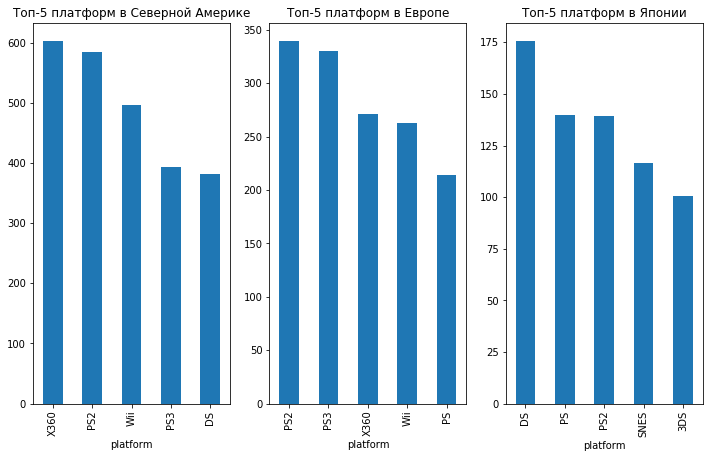

In [26]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 3, 1)
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()\
    .plot(kind='bar', title='Топ-5 платформ в Северной Америке')
plt.subplot(1, 3, 2)
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()\
    .plot(kind='bar', title='Топ-5 платформ в Европе')
plt.subplot(1, 3, 3)
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()\
    .plot(kind='bar', title='Топ-5 платформ в Японии')

В разных регионах популярность продаж по платформам сильно разнится.

Проверим влияние рейтинга на продажи по регионам.
 Для начала посмотрим значения рейтингов.

In [27]:
df['rating'].unique()

array(['E', 'unknoun', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [28]:
df.groupby('rating')['total_sales'].mean()

rating
AO         1.960000
E          0.610406
E10+       0.461690
EC         0.218750
K-A        1.440000
M          0.942924
RP         0.030000
T          0.504340
unknoun    0.421125
Name: total_sales, dtype: float64

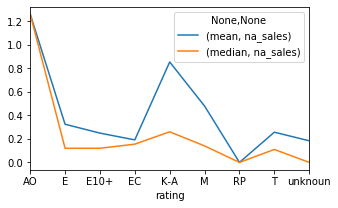

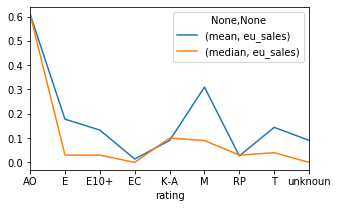

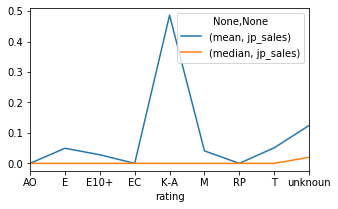

In [29]:
df.pivot_table(index='rating', values='na_sales', aggfunc=['mean', 'median']).plot(kind='line', figsize=(5, 3))
df.pivot_table(index='rating', values='eu_sales', aggfunc=['mean', 'median']).plot(kind='line', figsize=(5, 3))
df.pivot_table(index='rating', values='jp_sales', aggfunc=['mean', 'median']).plot(kind='line', figsize=(5, 3));

В Северной америке и в Европе сильно на рост продаж влияет рейтинг AO и в тоже время в Японии он не влияет ни как.А рейтинг E b EC и RP снижают продажи. Судя по медианному значению в Японии рейтинги не влияют на продажи.

## 5. Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 


Нулевой гипотизой обозначим равность средних пользовательских рейтингов `user_score` платформ Xbox One и PC. Соответственно альтернативной гипотизой будет не равенство средних рейтингов.

In [30]:
# Создадим 2 выборки по платформам Xbox One и PC
df_xone = df[df['platform'] == 'XOne']
df_pc = df[df['platform'] == 'PC']
# Создадим выборки рейтингов пользователей
rating_xone = df_xone['user_score']
rating_pc = df_pc['user_score']
# Удалим пропуски в данных
rating_xone = rating_xone.dropna().reset_index(drop=True)
rating_pc = rating_pc.dropna().reset_index(drop=True)
print('Средний рейтинго пользователей Xbox One', pd.Series(rating_xone).mean())
print('Средний рейтинго пользователей PC', pd.Series(rating_pc).mean())

Средний рейтинго пользователей Xbox One 6.521428571428572
Средний рейтинго пользователей PC 7.062467532467533


Т-тестом проверим гипотезу. Параметр альфа установим 5%

In [31]:
alpha = 0.05
results = st.ttest_ind(
    rating_xone, 
    rating_pc)
print('p-значение:',  results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Вторая гипотеза

2. Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевой гипотизой обозначим неравенство средних пользовательских рейтингов `user_score` жанра Action и Sports. Соответственно альтернативной гипотизой будет равенство средних рейтингов.

In [32]:
# Создадим 2 выборки по жанрам Action и Sports
df_action = df[df['genre'] == 'Action']
df_sports = df[df['genre'] == 'Sports']
# Создадим выборки рейтингов пользователей
rating_action = df_action['user_score']
rating_sports = df_sports['user_score']
# Удалим пропуски в данных
rating_action = rating_action.dropna().reset_index(drop=True)
rating_sports = rating_sports.dropna().reset_index(drop=True)
print('Средний рейтинго жанра Action', pd.Series(rating_action).mean())
print('Средний рейтинго жанра Sports', pd.Series(rating_sports).mean())

Средний рейтинго жанра Action 7.054043715846995
Средний рейтинго жанра Sports 6.961196736174069


Гипотезу проверим тоже Т-тестом

In [33]:
alpha = 0.05
results = st.ttest_ind(
    rating_action, 
    rating_sports,
    equal_var = False)
print('p-значение:',  results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


## 4. Вывод

* Мы определили что средний период существования платформы 13 лет. Следовательно если платформа моложе 6 лет то у нее есть еще потенциал.
* Из топ-5 платформ выяснили что рейтинги критиков и рейтинги пользователей положительно влияют на продажи игр при чем влияние критиков сильнее. 
* Также узнали что в Японии популярный жанр "Ролевые игры" - 39,87%, а в Северной америке и Европе "Экшн" - 24%. Не стоит в Японии акцентировать внимание на продаже игр в жанре Misc.
* И в каждом регионе популярностью пользуются разные платформи. Это тоже можно учитывать при распространении рекламы.
* Влияет показатель AO рейтинга ESRB на продажи в Северной америке и Европе очень сильно, а в Японии не влияют на продажи.
* на примере платформ Xbox One и PC убедились в *неравенстве* средних пользовательских рейтингов.
* проверили и убедились в *неравенстве* средних пользовательских рейтингов жанров  Action и Sports.
